In [262]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../input/train/train.csv', encoding='utf-8')
test = pd.read_csv('../input/test/test.csv', encoding='utf-8')
breeds = pd.read_csv('../input/breed_labels.csv')
colors = pd.read_csv('../input/color_labels.csv')
states = pd.read_csv('../input/state_labels.csv')

train = train.merge(breeds, how='left', left_on='Breed1', right_on='BreedID', suffixes=('', '_Breed1'))
train = train.merge(breeds, how='left', left_on='Breed2', right_on='BreedID', suffixes=('', '_Breed2'))
train = train.rename(columns={'BreedName': 'Breed1_Name', 'BreedName_Breed2': 'Breed2_Name'})
train = train.drop(['BreedID', 'BreedID_Breed2'], axis=1)

train = train.merge(colors, how='left', left_on='Color1', right_on='ColorID', suffixes=('', '_Color1'))
train = train.merge(colors, how='left', left_on='Color2', right_on='ColorID', suffixes=('', '_Color2'))
train = train.merge(colors, how='left', left_on='Color3', right_on='ColorID', suffixes=('', '_Color3'))
train = train.rename(columns={'ColorName':'Color1_Name', 'ColorName_Color2': 'Color2_Name', 'ColorName_Color3': 'Color3_Name'})
train = train.drop(['ColorID', 'ColorID_Color2', 'ColorID_Color3'], axis=1)

test = test.merge(breeds, how='left', left_on='Breed1', right_on='BreedID', suffixes=('', '_Breed1'))
test = test.merge(breeds, how='left', left_on='Breed2', right_on='BreedID', suffixes=('', '_Breed2'))
test = test.rename(columns={'BreedName': 'Breed1_Name', 'BreedName_Breed2': 'Breed2_Name'})
test = test.drop(['BreedID', 'BreedID_Breed2'], axis=1)

test = test.merge(colors, how='left', left_on='Color1', right_on='ColorID', suffixes=('', '_Color1'))
test = test.merge(colors, how='left', left_on='Color2', right_on='ColorID', suffixes=('', '_Color2'))
test = test.merge(colors, how='left', left_on='Color3', right_on='ColorID', suffixes=('', '_Color3'))
test = test.rename(columns={'ColorName':'Color1_Name', 'ColorName_Color2': 'Color2_Name', 'ColorName_Color3': 'Color3_Name'})
test = test.drop(['ColorID', 'ColorID_Color2', 'ColorID_Color3'], axis=1)

# train = train.merge(states, how='left', left_on='State', right_on='StateID')
# train = train.rename(columns={'StateName': 'State_Name'})
# train = train.drop(['StateID'], axis=1)

train['dataset_type'] = 'train'
test['dataset_type'] = 'test'
data = pd.concat([train, test])

data.shape

(18965, 32)

In [263]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'Type_Breed1', 'Breed1_Name', 'Type_Breed2', 'Breed2_Name',
       'Color1_Name', 'Color2_Name', 'Color3_Name', 'dataset_type'],
      dtype='object')

In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18965 entries, 0 to 3971
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           18965 non-null  int64  
 1   Name           17286 non-null  object 
 2   Age            18965 non-null  int64  
 3   Breed1         18965 non-null  int64  
 4   Breed2         18965 non-null  int64  
 5   Gender         18965 non-null  int64  
 6   Color1         18965 non-null  int64  
 7   Color2         18965 non-null  int64  
 8   Color3         18965 non-null  int64  
 9   MaturitySize   18965 non-null  int64  
 10  FurLength      18965 non-null  int64  
 11  Vaccinated     18965 non-null  int64  
 12  Dewormed       18965 non-null  int64  
 13  Sterilized     18965 non-null  int64  
 14  Health         18965 non-null  int64  
 15  Quantity       18965 non-null  int64  
 16  Fee            18965 non-null  int64  
 17  State          18965 non-null  int64  
 18  RescuerID   

In [265]:
data.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,...,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed,Type_Breed1,Type_Breed2
count,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,...,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,18965.000000,14993.000000,18960.000000,5236.000000
mean,1.460480,10.627683,264.928289,72.355392,1.774848,2.239916,3.234379,1.886528,1.859214,1.463960,...,1.910203,1.037437,1.580490,21.366728,41346.286106,0.053783,3.837385,2.516441,1.459705,1.409855
std,0.498449,18.022614,60.097639,122.052265,0.683081,1.753749,2.743184,2.982069,0.549112,0.599542,...,0.573076,0.201427,1.478389,78.595567,32.557087,0.337580,3.465506,1.177265,0.498387,0.491854
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000,1.000000,1.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,...,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000,1.000000,1.000000
75%,2.000000,12.000000,307.000000,141.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000,2.000000,2.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,...,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000,2.000000,2.000000


In [266]:
data.isnull().sum()

Type                 0
Name              1679
Age                  0
Breed1               0
Breed2               0
Gender               0
Color1               0
Color2               0
Color3               0
MaturitySize         0
FurLength            0
Vaccinated           0
Dewormed             0
Sterilized           0
Health               0
Quantity             0
Fee                  0
State                0
RescuerID            0
VideoAmt             0
Description         14
PetID                0
PhotoAmt             0
AdoptionSpeed     3972
Type_Breed1          5
Breed1_Name          5
Type_Breed2      13729
Breed2_Name      13729
Color1_Name          0
Color2_Name       5625
Color3_Name      13387
dataset_type         0
dtype: int64

In [267]:
data['Name'] = data['Name'].fillna('No name')
data['Name'] = data['Name'].apply(lambda x: 'Unknown' if 'No' in x else x)
data['Name'] = data['Name'].apply(lambda x: 'Unknown' if 'Name' in x else x)
data['Description'] = data['Description'].fillna('No description')
data['Breed1_Name'] = data['Breed1_Name'].fillna('Unknown')

data['Type_Breed1'] = data['Type_Breed1'].fillna('Unknown')
data['Type_Breed2'] = data['Type_Breed2'].fillna('Unknown')
data['Breed2_Name'] = data['Breed2_Name'].fillna('Unknown')
data['Color2_Name'] = data['Color2_Name'].fillna('Unknown')
data['Color3_Name'] = data['Color3_Name'].fillna('Unknown')
data['AdoptionSpeed'] = data['AdoptionSpeed'].fillna(0)

In [268]:
data.isnull().sum()

Type             0
Name             0
Age              0
Breed1           0
Breed2           0
Gender           0
Color1           0
Color2           0
Color3           0
MaturitySize     0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Quantity         0
Fee              0
State            0
RescuerID        0
VideoAmt         0
Description      0
PetID            0
PhotoAmt         0
AdoptionSpeed    0
Type_Breed1      0
Breed1_Name      0
Type_Breed2      0
Breed2_Name      0
Color1_Name      0
Color2_Name      0
Color3_Name      0
dataset_type     0
dtype: int64

In [269]:
data.duplicated().sum()

np.int64(0)

# Preprocessing

In [270]:
data['Gender'] = data['Gender'].replace(3, 'Unknown')
data['Gender'] = data['Gender'].replace({1: 'Male', 2: 'Female'})

In [271]:
data['FurLength'] = data['FurLength'].replace({0: 'Not specified', 1: 'Short', 2: 'Medium', 3: 'Long'})

In [272]:
data['Type'] = data['Type'].replace({1: 'Dog', 2: 'Cat'})

In [273]:
data['Health'] = data['Health'].replace({1: 'Healthy', 2: 'Minor Injury', 3: 'Serious Injury', 0: 'Not Specified'})

In [274]:
data['MaturitySize'] = data['MaturitySize'].replace({
    1: 'Small', 
    2: 'Medium', 
    3: 'Large', 
    4: 'Extra Large', 
    0: 'Not Specified'
})

In [275]:
data['Vaccinated'] = data['Vaccinated'].replace({1: 'Yes', 2: 'No', 3: 'Not Sure'})
data['Dewormed'] = data['Dewormed'].replace({1: 'Yes', 2: 'No', 3: 'Not Sure'})
data['Sterilized'] = data['Sterilized'].replace({1: 'Yes', 2: 'No', 3: 'Not Sure'})

In [276]:
# Combine color columns, removing empty parts
data['Color'] = (data['Color1_Name'].replace('Unknown', '') + " " +
                      data['Color2_Name'].replace('Unknown', '') + " " +
                      data['Color3_Name'].replace('Unknown', ''))

# Filter for Male Cats
male_cats = data[data['Gender'] == 'Male']

# Count popular colors
popular_colors = male_cats['Color'].value_counts()

# Display top 5 popular colors
print("Most Popular Colors for Male Cats (excluding 'Unknown'):")
for color, count in popular_colors.head(5).items():
    print(f"{color.replace('__', ' ')}: {count}")

Most Popular Colors for Male Cats (excluding 'Unknown'):
Black White : 806
Brown  : 684
Black Brown : 627
Black  : 571
Brown White : 468


In [277]:
data['Color'].value_counts()

Color
Brown                  1816
Black White            1783
Black Brown            1765
Black Brown White      1457
Black                  1242
                       ... 
Black Golden Yellow      24
Golden Cream Gray        11
Yellow Gray              10
Yellow Cream Gray         7
Golden Yellow Gray        5
Name: count, Length: 63, dtype: int64

In [278]:
# Replace 'Unknown' and 'Mixed Breed' in 'Breed2_Name' with an empty string
data['Breed2_Name'] = data['Breed2_Name'].replace('Unknown', '')

# Combine 'Breed1_Name' and 'Breed2_Name' without duplicates
data['Breed'] = data.apply(
    lambda row: row['Breed1_Name'] if row['Breed1_Name'] == row['Breed2_Name'] or row['Breed2_Name'] == ''
    else row['Breed1_Name'] + "/" + row['Breed2_Name'], axis=1
)

# Count the occurrences of each breed
data['Breed'].value_counts()

Breed
Mixed Breed                               6937
Domestic Short Hair                       4275
Domestic Medium Hair                      1374
Tabby                                      305
Domestic Long Hair                         246
                                          ... 
Birman/Bengal                                1
Fila Brasileiro                              1
Siamese/American Curl                        1
Silky Terrier/Yorkshire Terrier Yorkie       1
Japanese Bobtail/Bobtail                     1
Name: count, Length: 886, dtype: int64

In [279]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[-1, 18, 36, np.inf], 
                           labels=['Puppy', 'Adult', 'Senior'])

# Check the distribution of the new categories
print(data['AgeGroup'].value_counts())

AgeGroup
Puppy     15938
Adult      1797
Senior     1230
Name: count, dtype: int64


In [280]:
data['FeeCategory'] = data['Fee'].apply(lambda x: 'Yes' if x == 0 else 'No')
data['FeeCategory'].value_counts()

FeeCategory
Yes    16060
No      2905
Name: count, dtype: int64

In [281]:
# bins = [-1, 0, 200, 500, 1000, np.inf]  # -1 to include 0 correctly
# labels = ['Free', 'Low', 'Moderate', 'High', 'Premium']

# # Categorize Fee
# data['FeeCategory'] = pd.cut(data['Fee'], bins=bins, labels=labels)

# data['FeeCategory'].value_counts()

In [282]:
import os
from collections import defaultdict

# Define the directory containing the images
image_directory = "../input/images/"

# Create a dictionary to map PetID to all its images
def create_image_lookup(image_directory):
    """Map each PetID to its corresponding image paths."""
    image_lookup = defaultdict(list)
    for image_file in os.listdir(image_directory):
        # Check if the file matches the PetID pattern
        if image_file.endswith(('.jpg', '.jpeg', '.png')):
            pet_id = image_file.split("-")[0]  # Extract the PetID
            image_lookup[pet_id].append(os.path.join(image_directory, image_file))
    return image_lookup

# Build the lookup dictionary
image_lookup = create_image_lookup(image_directory)

# Add a column in the dataset using the lookup dictionary
data['image_paths'] = data['PetID'].map(image_lookup)

# data.to_csv('cleaned_data2.csv', index=False)

In [283]:
# # Histogram for Age
# sns.histplot(train['Age'], kde=True, bins=30)
# plt.title('Age Distribution')
# plt.show()

In [284]:
# # Correlation heatmap
# numerical_features = ['Age', 'Fee', 'PhotoAmt', 'VideoAmt', 'Quantity']
# correlation = train[numerical_features + ['AdoptionSpeed']].corr()
# sns.heatmap(correlation, annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()

In [285]:
# data.to_csv('cleaned_data.csv', index=False)

# Subset

In [286]:
data = data[(data['Fee'] > 100) | (data['Fee'] == 0)]
data.shape

(17166, 37)

In [287]:
data = data[data['Breed1_Name'] != 'Unknown']
data.shape

(17163, 37)

In [288]:

data.shape

(17163, 37)

In [289]:
# Define a function to count words in a string
def word_count(name):
    return len(name.split())

# Apply the function to filter rows
data = data[data['Name'].apply(word_count) <= 2]

# Display the shape of the filtered data
data.shape
data = data.reset_index(drop=True)
data.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Breed2_Name,Color1_Name,Color2_Name,Color3_Name,dataset_type,Color,Breed,AgeGroup,FeeCategory,image_paths
0,Cat,Unknown,1,265,0,Male,1,2,0,Medium,...,,Black,Brown,Unknown,train,Black Brown,Domestic Medium Hair,Puppy,Yes,"[../input/images/6296e909a-1.jpg, ../input/ima..."
1,Dog,Brisco,1,307,0,Male,2,7,0,Medium,...,,Brown,White,Unknown,train,Brown White,Mixed Breed,Puppy,Yes,"[../input/images/3422e4906-1.jpg, ../input/ima..."
2,Dog,Miko,4,307,0,Female,1,2,0,Medium,...,,Black,Brown,Unknown,train,Black Brown,Mixed Breed,Puppy,No,"[../input/images/5842f1ff5-1.jpg, ../input/ima..."
3,Dog,Hunter,1,307,0,Male,1,0,0,Medium,...,,Black,Unknown,Unknown,train,Black,Mixed Breed,Puppy,Yes,"[../input/images/850a43f90-1.jpg, ../input/ima..."
4,Cat,Unknown,3,266,0,Female,5,6,0,Medium,...,,Cream,Gray,Unknown,train,Cream Gray,Domestic Short Hair,Puppy,Yes,"[../input/images/d24c30b4b-1.jpg, ../input/ima..."


In [290]:
data['Fee'].unique()

array([   0,  150,  300,  750,  400,  250,  200,  120,  500,  350,  550,
        110,  220,  280,  450,  600,  180,  700,  170,  155,  299,  160,
        688,  270, 1000,  650,  210,  188,  108,  390,  380,  800,  235,
       2000,  125,  499,  190, 1500,  228,  290,  148])

In [291]:
data.columns

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'Type_Breed1', 'Breed1_Name', 'Type_Breed2', 'Breed2_Name',
       'Color1_Name', 'Color2_Name', 'Color3_Name', 'dataset_type', 'Color',
       'Breed', 'AgeGroup', 'FeeCategory', 'image_paths'],
      dtype='object')

In [292]:
columns_to_drop = ['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'State', 'RescuerID', 'VideoAmt', 'Description', 'AdoptionSpeed', 'Type_Breed1', 'Type_Breed2', 'Breed2_Name', 'Color2_Name', 'Color3_Name', 'dataset_type']
data = data.drop(columns=columns_to_drop, axis=1)

In [293]:
data.columns

Index(['Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'PetID', 'PhotoAmt', 'Breed1_Name', 'Color1_Name', 'Color', 'Breed',
       'AgeGroup', 'FeeCategory', 'image_paths'],
      dtype='object')

In [294]:
# train['Free'] = train['Fee'].apply(lambda x: 'Yes' if x == 0 else 'No')
# train.head()

In [295]:
data.to_csv('cleaned_data.csv', index=False, encoding='utf-8')
# tmp = pd.read_csv('cleaned_data.csv')

In [296]:
data.shape

(13819, 21)

In [297]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Type          13819 non-null  object  
 1   Name          13819 non-null  object  
 2   Age           13819 non-null  int64   
 3   Gender        13819 non-null  object  
 4   MaturitySize  13819 non-null  object  
 5   FurLength     13819 non-null  object  
 6   Vaccinated    13819 non-null  object  
 7   Dewormed      13819 non-null  object  
 8   Sterilized    13819 non-null  object  
 9   Health        13819 non-null  object  
 10  Quantity      13819 non-null  int64   
 11  Fee           13819 non-null  int64   
 12  PetID         13819 non-null  object  
 13  PhotoAmt      13819 non-null  float64 
 14  Breed1_Name   13819 non-null  object  
 15  Color1_Name   13819 non-null  object  
 16  Color         13819 non-null  object  
 17  Breed         13819 non-null  object  
 18  AgeGro

# Visualizing

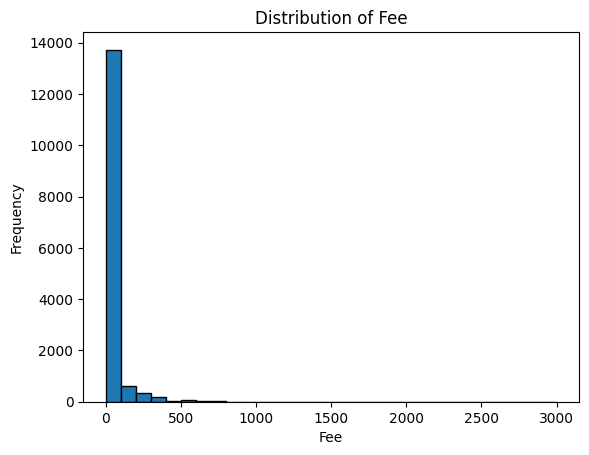

In [298]:

plt.hist(train['Fee'], bins=30, edgecolor='k')
plt.title('Distribution of Fee')
plt.xlabel('Fee')
plt.ylabel('Frequency')
plt.show()

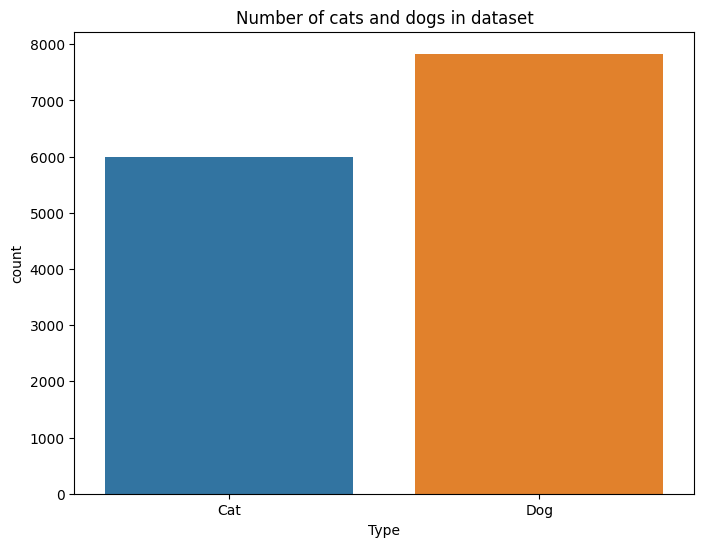

In [299]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=data, hue='Type')
plt.title('Number of cats and dogs in dataset')
plt.show()

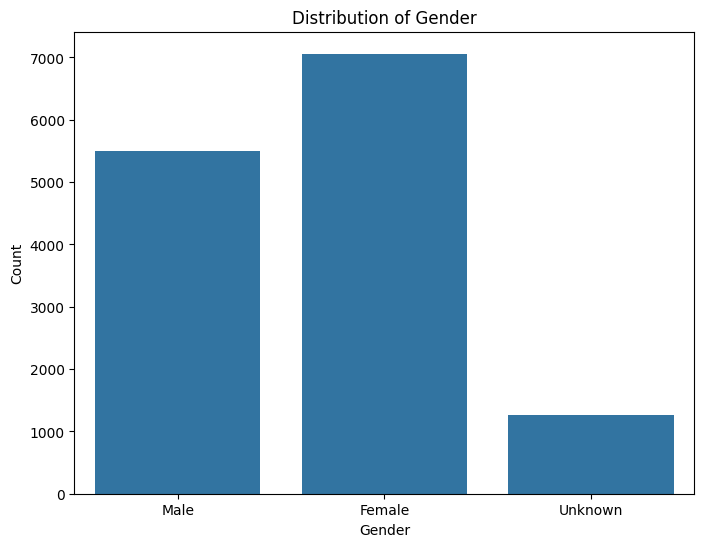

In [300]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Male', 'Female', 'Unknown'])
plt.show()

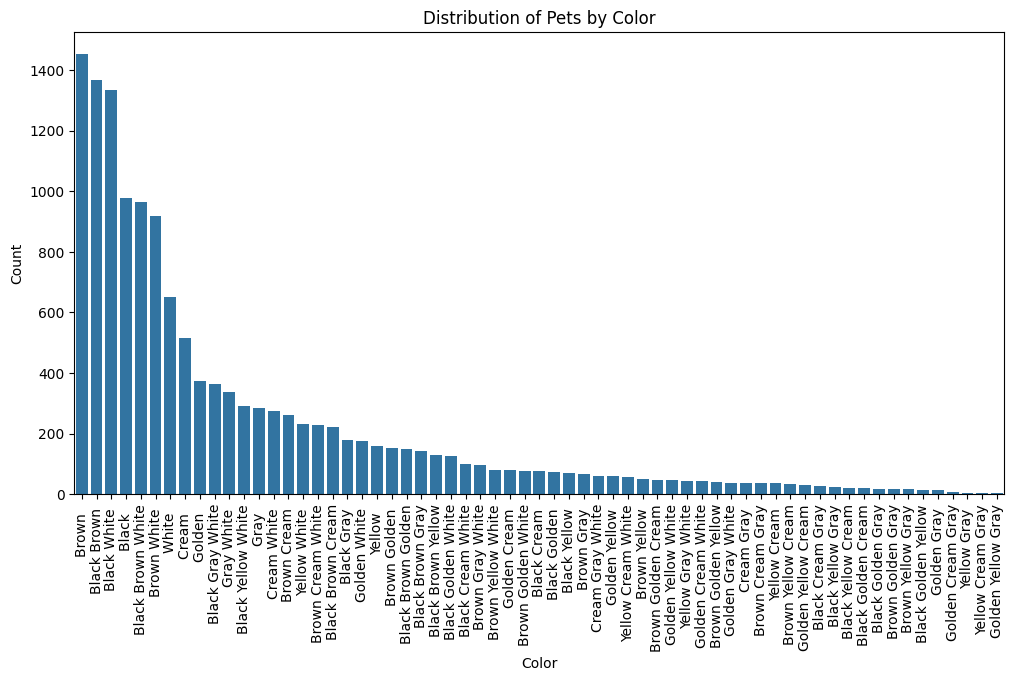

In [301]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Color', data=data, order=data['Color'].value_counts().index)
plt.title('Distribution of Pets by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

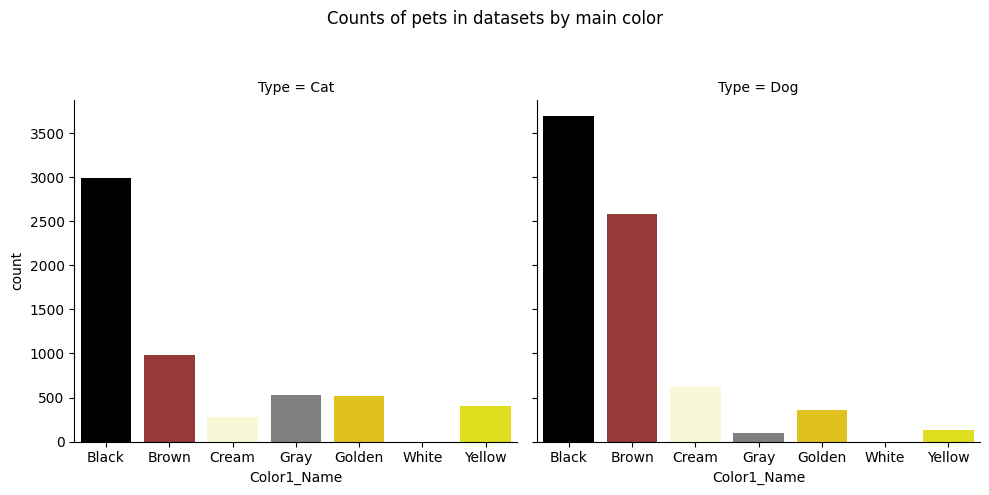

In [302]:
sns.catplot(x='Color1_Name', col='Type', data=data, kind='count', hue='Color1_Name', palette=['Black', 'Brown', '#FFFDD0', 'Gray', 'Gold', 'White', 'Yellow'])
plt.subplots_adjust(top=0.8)
plt.suptitle('Counts of pets in datasets by main color')
plt.show()

# Feature Scaling and label encoding

In [303]:
data.columns

Index(['Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'PetID', 'PhotoAmt', 'Breed1_Name', 'Color1_Name', 'Color', 'Breed',
       'AgeGroup', 'FeeCategory', 'image_paths'],
      dtype='object')

In [304]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# ## Encode categorical variables
le_breed = LabelEncoder()
# data['Breed'] = le_breed.fit_transform(data['Breed'])
# # Save classes for decoding
# breed_classes = le_breed.classes_  # Store the classes for debugging if needed

le_Type = LabelEncoder()
data['Type'] = le_Type.fit_transform(data['Type'])

# le_Name = LabelEncoder()
# data['Name'] = le_Name.fit_transform(data['Name'])

le_AgeGroup = LabelEncoder()
data["AgeGroup"] = le_AgeGroup.fit_transform(data["AgeGroup"])

le_Gender = LabelEncoder()
data['Gender'] = le_Gender.fit_transform(data['Gender'])

le_Color1_Name = LabelEncoder()
data['Color1_Name'] = le_Color1_Name.fit_transform(data['Color1_Name'])

le_MaturitySize = LabelEncoder()
data['MaturitySize'] = le_MaturitySize.fit_transform(data['MaturitySize'])

le_FurLength = LabelEncoder()
data['FurLength'] = le_FurLength.fit_transform(data['FurLength'])

# le_Vaccinated = LabelEncoder()  
# data['Vaccinated'] = le_Vaccinated.fit_transform(data['Vaccinated'])

# le_Dewormed = LabelEncoder()
# data['Dewormed'] = le_Dewormed.fit_transform(data['Dewormed'])

# le_Sterilized = LabelEncoder()
# data['Sterilized'] = le_Sterilized.fit_transform(data['Sterilized'])

# le_Health = LabelEncoder()
# data['Health'] = le_Health.fit_transform(data['Health'])

# le_FeeCategory = LabelEncoder()
# data['FeeCategory'] = le_FeeCategory.fit_transform(data['FeeCategory'])


# le_Color = LabelEncoder()
# data['Color'] = le_Color.fit_transform(data['Color'])

# Feature scaling
# scaler = StandardScaler()
# numerical_features = ['Age', 'Fee']
# data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Modeling

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [306]:
data.columns

Index(['Type', 'Name', 'Age', 'Gender', 'MaturitySize', 'FurLength',
       'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
       'PetID', 'PhotoAmt', 'Breed1_Name', 'Color1_Name', 'Color', 'Breed',
       'AgeGroup', 'FeeCategory', 'image_paths'],
      dtype='object')

# DTCLF

In [307]:
from sklearn.tree import DecisionTreeClassifier

features = ['Type', 'Gender', 'Age', 'Color1_Name', 'FurLength', 'MaturitySize']

features2 = ['Type', 'Age', 'Gender', 'MaturitySize', 'FurLength',
            'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Quantity', 'Fee',
            'PhotoAmt', 'Color1_Name', 'Color',
            'AgeGroup', 'FeeCategory']

X = data[features]
y = data['Breed1_Name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=32)

# Initialize GridSearchCV
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Test Accuracy: {accuracy:.2f}")


c:\Users\Zaw Linn Htet\pet-discovery\myenv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Test Accuracy: 0.69


In [308]:
# # Calculate feature importance
# feature_importance = pd.Series(best_model.feature_importances_, index=features).sort_values(ascending=False)

# # Display feature importance
# print("Feature Importance:")
# print(feature_importance)

# # Plot feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x=feature_importance, y=feature_importance.index)
# plt.title('Feature Importance')
# plt.xlabel('Importance')
# plt.ylabel('Feature')
# plt.show()

In [309]:
# image_directory = "../input/images/" 
# data['image_path'] = data['PetID'].apply(lambda x: f"{image_directory}{x}-1.jpg")

# # Inspect the data
# print(data[['Breed1_Name', 'Name', 'Type', 'PhotoAmt', 'image_path']].head())

In [310]:
# Example function to retrieve related data based on breed prediction
def get_related_pets(predicted_breed, data):
    """Retrieve data for a given breed."""
    
    related_pets = data[data['Breed'].str.contains(predicted_breed, case=False, na=False)]  
    
    related_pets = related_pets.copy()
    
    # Select up to max_results entries
    return related_pets[['Breed', 'Type', 'Name', 'Gender', 'Age', 'Color', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'Fee',  'FeeCategory', 'image_paths', 'FurLength', 'MaturitySize']]


# Predict

In [311]:
# Predict a sample
sample = X_test.iloc[[8]]  # Select the first row as a sample
predicted_breed = best_model.predict(sample)  
result = get_related_pets(predicted_breed[0], data)

result

,Breed,Type,Name,Gender,Age,Color,Vaccinated,Dewormed,Sterilized,Health,Fee,FeeCategory,image_paths,FurLength,MaturitySize
1,Mixed Breed,1,Brisco,1,1,Brown White,Yes,Yes,No,Healthy,0,Yes,"[../input/images/3422e4906-1.jpg, ../input/ima...",1,2
2,Mixed Breed,1,Miko,0,4,Black Brown,Yes,Yes,No,Healthy,150,No,"[../input/images/5842f1ff5-1.jpg, ../input/ima...",2,2
3,Mixed Breed,1,Hunter,1,1,Black,No,No,No,Healthy,0,Yes,"[../input/images/850a43f90-1.jpg, ../input/ima...",2,2
8,Mixed Breed,1,Bear,1,2,Black Brown White,No,Yes,No,Healthy,0,Yes,"[../input/images/8b693ca84-1.jpg, ../input/ima...",2,2
9,Mixed Breed,1,Peanut,1,2,Brown Cream Gray,Yes,Yes,No,Healthy,0,Yes,[../input/images/aaedd873d-1.jpg],0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13804,Mixed Breed,1,Babydog,0,3,Golden,No,No,No,Minor Injury,0,Yes,"[../input/images/31822feba-1.jpg, ../input/ima...",2,2
13805,Mixed Breed,1,Unknown,0,1,Black Brown,Yes,Yes,Yes,Healthy,0,Yes,[../input/images/ea6d84c73-1.jpg],2,3
13814,Mixed Breed,1,Hugo,1,5,Black Brown,Yes,Yes,No,Healthy,150,No,"[../input/images/ae57f8d52-1.jpg, ../input/ima...",2,2
13815,Mixed Breed,1,Spot,1,30,Black Brown White,Not Sure,Yes,No,Healthy,0,Yes,"[../input/images/83432904d-1.jpg, ../input/ima...",2,2


In [312]:
X_test.iloc[8]

Type            1
Gender          0
Age             2
Color1_Name     0
FurLength       2
MaturitySize    2
Name: 8507, dtype: int64

In [313]:
# Define user preferences based on the sample
sample_data = data.loc[sample.index].squeeze()

user_preferences = {
    'Color1_Name': sample_data.get('Color1_Name', None),
    'Age': sample_data['Age'],
    'Type': sample_data['Type'],
    'Gender': sample_data['Gender'],
    'FurLength': sample_data['FurLength'], 
    'MaturitySize': sample_data['MaturitySize']  
}

# Calculate similarity scores
def calculate_similarity_score(row, user_preferences):
    """Calculate a weighted similarity score for a given pet."""
    score = 0
    if user_preferences.get('Color1_Name') and row.get('Color1_Name') == user_preferences['Color1_Name']:
        score += 1
    if row['Age'] == user_preferences['Age']:
        score += 1
    if row['Type'] == user_preferences['Type']:
        score += 1
    if row['Gender'] == user_preferences['Gender']:
        score += 1
    if row['FurLength'] == user_preferences['FurLength']:
        score += 1
    if row['MaturitySize'] == user_preferences['MaturitySize']:
        score += 1
    return score

# Calculate similarity scores
result['similarity_score'] = result.apply(
    lambda row: calculate_similarity_score(row, user_preferences), axis=1
)

# Rank and display top 5 results
top_5_pets = result.sort_values(by='similarity_score', ascending=False).head(5)
top_5_pets


,Breed,Type,Name,Gender,Age,Color,Vaccinated,Dewormed,Sterilized,Health,Fee,FeeCategory,image_paths,FurLength,MaturitySize,similarity_score
56,Mixed Breed,1,Coco,0,2,Brown Cream,No,Yes,No,Healthy,0,Yes,[../input/images/259b10a3e-1.jpg],2,2,5
10137,Mixed Breed,1,Princess,0,2,Brown White,No,No,No,Healthy,0,Yes,"[../input/images/a2c98c186-1.jpg, ../input/ima...",2,2,5
9889,Labrador Retriever/Mixed Breed,1,Azula,0,2,Black Brown,Not Sure,Not Sure,No,Healthy,0,Yes,"[../input/images/2b5c446cc-1.jpg, ../input/ima...",2,2,5
11071,Mixed Breed,1,June,0,2,Black Brown Cream,Yes,Yes,No,Healthy,0,Yes,"[../input/images/eb2aaaae6-1.jpg, ../input/ima...",2,2,5
11529,Mixed Breed,1,Heidy,0,2,Brown,Yes,Yes,No,Healthy,250,No,[../input/images/f6b57955c-1.jpg],2,2,5


Name: Coco
Type: Dog
Gender: Female
Age (Months): 2
Breed: Mixed Breed
Color: Brown Cream 
FurLength: Short
MaturitySize: Medium
Vaccinated: No
Dewormed: Yes
Sterilized: No
Health: Healthy
Fee: 0
Images:


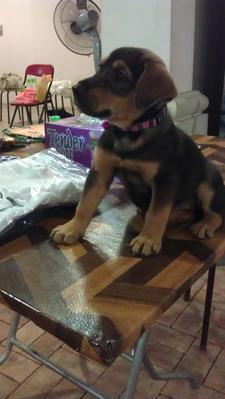

--------------------------------------------------
Name: Princess
Type: Dog
Gender: Female
Age (Months): 2
Breed: Mixed Breed
Color: Brown White 
FurLength: Short
MaturitySize: Medium
Vaccinated: No
Dewormed: No
Sterilized: No
Health: Healthy
Fee: 0
Images:


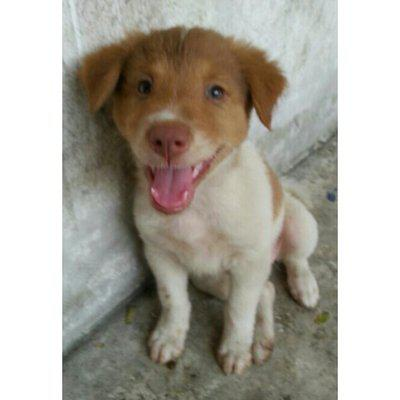

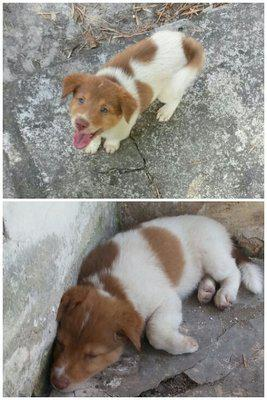

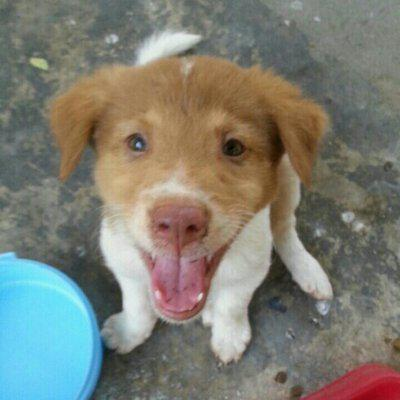

--------------------------------------------------
Name: Azula
Type: Dog
Gender: Female
Age (Months): 2
Breed: Labrador Retriever/Mixed Breed
Color: Black Brown 
FurLength: Short
MaturitySize: Medium
Vaccinated: Not Sure
Dewormed: Not Sure
Sterilized: No
Health: Healthy
Fee: 0
Images:


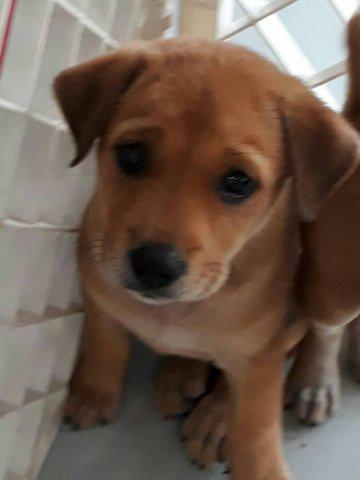

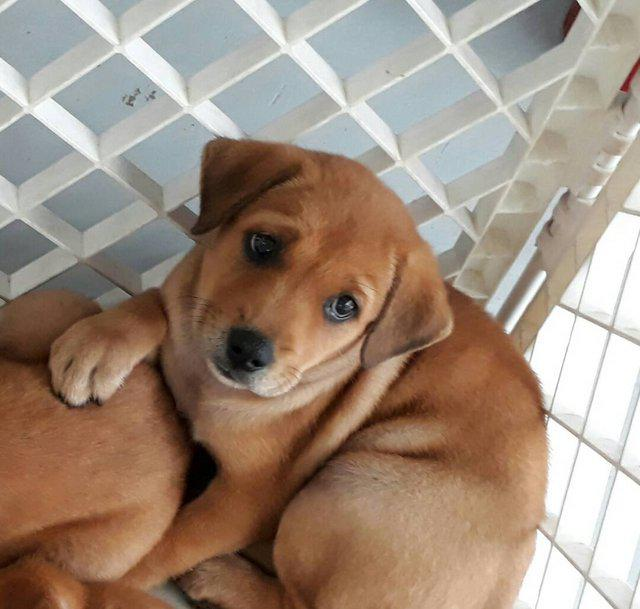

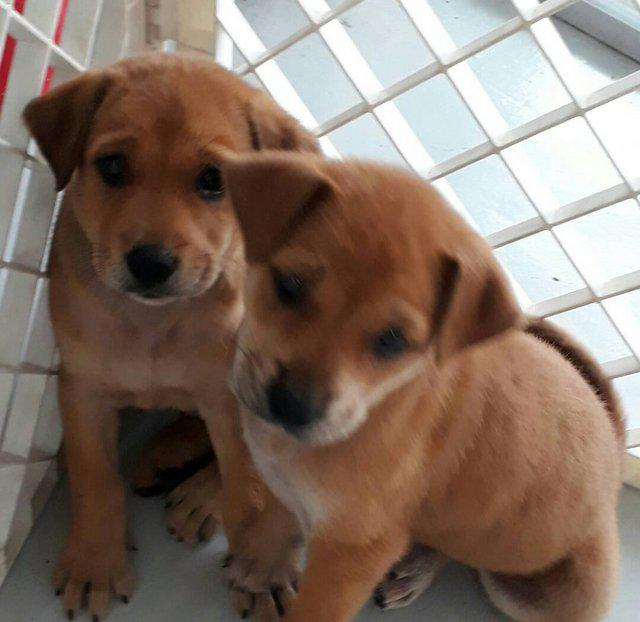

--------------------------------------------------
Name: June
Type: Dog
Gender: Female
Age (Months): 2
Breed: Mixed Breed
Color: Black Brown Cream
FurLength: Short
MaturitySize: Medium
Vaccinated: Yes
Dewormed: Yes
Sterilized: No
Health: Healthy
Fee: 0
Images:


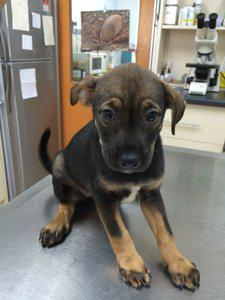

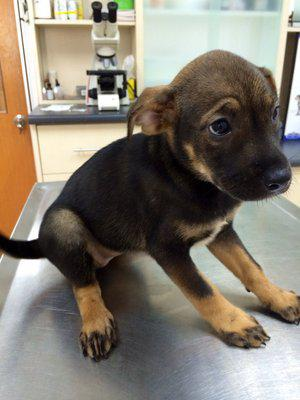

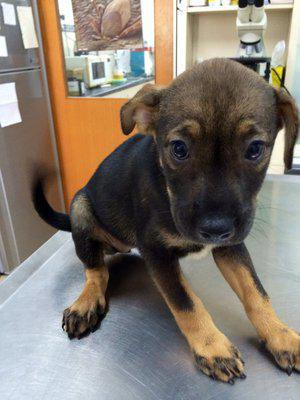

--------------------------------------------------
Name: Heidy
Type: Dog
Gender: Female
Age (Months): 2
Breed: Mixed Breed
Color: Brown  
FurLength: Short
MaturitySize: Medium
Vaccinated: Yes
Dewormed: Yes
Sterilized: No
Health: Healthy
Fee: 250
Images:


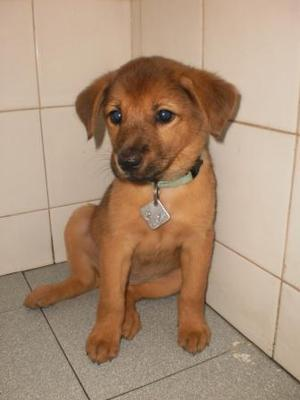

--------------------------------------------------


In [314]:
from IPython.display import Image, display

for _, pet in top_5_pets.iterrows():
    print(f"Name: {pet['Name']}")
    print(f"Type: {le_Type.inverse_transform([pet['Type']])[0]}")  # Wrap scalar in list
    print(f"Gender: {le_Gender.inverse_transform([pet['Gender']])[0]}")  # Wrap scalar in list
    print(f"Age (Months): {pet['Age']}")
    print(f"Breed: {pet['Breed']}")
    print(f"Color: {pet['Color']}")  # Wrap scalar in list
    print(f"FurLength: {le_FurLength.inverse_transform([pet['FurLength']])[0]}")
    print(f"MaturitySize: {le_MaturitySize.inverse_transform([pet['MaturitySize']])[0]}")
    print(f"Vaccinated: {pet['Vaccinated']}")  # Wrap scalar in list
    print(f"Dewormed: {pet['Dewormed']}")  # Wrap scalar in list
    print(f"Sterilized: {pet['Sterilized']}")  # Wrap scalar in list
    print(f"Health: {pet['Health']}")  # Wrap scalar in list
    print(f"Fee: {pet['Fee']}")
    print("Images:")
    
    # Display up to 3 images
    if isinstance(pet['image_paths'], list):  # Check if image_paths is a list
        for image_path in pet['image_paths'][:3]:
            try:
                display(Image(filename=image_path, width=300, height=300))
            except FileNotFoundError:
                print(f"Image not found: {image_path}")
    else:
        print("No valid image paths provided.")
    
    print("-" * 50)


In [315]:
data = {
    "model": best_model,  # Your trained decision tree model
    "le_AgeGroup": le_AgeGroup,  # Label encoder for AgeGroup (example) 
    "le_Type": le_Type,  # Add other label encoders similarly
    "le_Gender": le_Gender,
    "le_MaturitySize": le_MaturitySize,
    "le_Color1_Name": le_Color1_Name,
    "le_FurLength": le_FurLength,
    # "le_Breed": le_breed,  # Label encoder for Breed1_Name
    # "scaler": scaler  # StandardScaler
}

joblib.dump(data, 'breed_predict_model.pkl')       

['breed_predict_model.pkl']